In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Dropout,Flatten
from tensorflow.keras.models import Sequential

import cv2
import os

In [3]:
path='./Data/images/'
file=os.listdir('./Data/images/')

features=[]
labels=[]

for img in file:
    label=int(img[:3])
    labels.append(label)
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
    img_array=cv2.resize(img_array,(220,220))
    features.append(img_array)
    

In [4]:
df = pd.DataFrame(labels)
df.value_counts()

6     100
2      93
4      90
9      90
7      89
5      88
10     84
1      82
3      61
8      55
dtype: int64

In [5]:
name_dict={'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', 
        '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '0010': 'Vanessa_cardui'} 

list_labels=[]

for i in labels:
    new_label=name_dict['00'+str(i)]
    list_labels.append(new_label)
    

In [6]:
le=LabelEncoder()
y=le.fit_transform(list_labels)
y=to_categorical(y)
y.shape

(832, 10)

In [7]:
features[0].shape

(220, 220, 3)

In [8]:
features=np.array(features)
features=features/255.0
features=features.reshape(-1,220,220,3)

In [9]:
features.shape

(832, 220, 220, 3)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(features,y,random_state=42,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(665, 220, 220, 3) (167, 220, 220, 3) (665, 10) (167, 10)


In [11]:
mnet = tensorflow.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, 
                                                      input_shape=(220, 220, 3),#same as of custom model
                                                      pooling='avg',
                                                      weights='imagenet')

model2=Sequential([
    mnet,
    Dropout(0.25),
    Dense(10,activation='softmax') # here we use 10 layers because we have to predict bewtween 10 classes
])

model2.layers[0].trainable = False
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history2=model2.fit(x_train,y_train,batch_size=12, epochs=100,validation_split=0.3)

Epoch 1/100
39/39 [==============================] - 12s 265ms/step - loss: 1.7696 - acc: 0.4387 - val_loss: 0.9722 - val_acc: 0.7900
Epoch 2/100
39/39 [==============================] - 9s 232ms/step - loss: 0.6348 - acc: 0.8538 - val_loss: 0.5861 - val_acc: 0.9000
Epoch 3/100
39/39 [==============================] - 9s 227ms/step - loss: 0.3742 - acc: 0.9312 - val_loss: 0.4600 - val_acc: 0.9200
Epoch 4/100
39/39 [==============================] - 9s 229ms/step - loss: 0.2414 - acc: 0.9613 - val_loss: 0.3585 - val_acc: 0.9400
Epoch 5/100
39/39 [==============================] - 9s 229ms/step - loss: 0.1848 - acc: 0.9763 - val_loss: 0.3222 - val_acc: 0.9350
Epoch 6/100
39/39 [==============================] - 9s 227ms/step - loss: 0.1385 - acc: 0.9892 - val_loss: 0.2805 - val_acc: 0.9400
Epoch 7/100
39/39 [==============================] - 9s 235ms/step - loss: 0.1209 - acc: 0.9935 - val_loss: 0.2581 - val_acc: 0.9550
Epoch 8/100
39/39 [==============================] - 9s 244ms/step -

Epoch 61/100
39/39 [==============================] - 9s 235ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.1408 - val_acc: 0.9750
Epoch 62/100
39/39 [==============================] - 10s 251ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.1437 - val_acc: 0.9700
Epoch 63/100
39/39 [==============================] - 10s 255ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.1375 - val_acc: 0.9800
Epoch 64/100
39/39 [==============================] - 10s 255ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.1346 - val_acc: 0.9800
Epoch 65/100
39/39 [==============================] - 10s 250ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.1353 - val_acc: 0.9750
Epoch 66/100
39/39 [==============================] - 11s 271ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.1395 - val_acc: 0.9750
Epoch 67/100
39/39 [==============================] - 9s 228ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.1388 - val_acc: 0.9750
Epoch 68/100
39/39 [==============================] - 10s

In [12]:
loss,accuracy=model2.evaluate(x_test,y_test)

6/6 [==============================] - 2s 361ms/step - loss: 0.1042 - acc: 0.9760


In [16]:
print(history2.history)

{'loss': [1.769642949104309, 0.6348049640655518, 0.3742043077945709, 0.24137921631336212, 0.18476107716560364, 0.13851474225521088, 0.12086018919944763, 0.08554313331842422, 0.08040839433670044, 0.06417843699455261, 0.056199654936790466, 0.05158962309360504, 0.043420594185590744, 0.03858555480837822, 0.03714299201965332, 0.03620252013206482, 0.02555108815431595, 0.02776249311864376, 0.02131327986717224, 0.022271014750003815, 0.02083275094628334, 0.018304944038391113, 0.016237644478678703, 0.01651063747704029, 0.014127125963568687, 0.01588912308216095, 0.0150491027161479, 0.01330654975026846, 0.011953325010836124, 0.01167464442551136, 0.011060790158808231, 0.010249442420899868, 0.011068309657275677, 0.010170466266572475, 0.008934869430959225, 0.009390478953719139, 0.008194324560463428, 0.0076574054546654224, 0.008503502234816551, 0.00780063821002841, 0.007488115690648556, 0.007110998500138521, 0.006275758612900972, 0.005662775132805109, 0.006351018324494362, 0.006396094802767038, 0.0054

In [19]:
acc = history2.history['acc']
loss = history2.history['loss']
val_acc = history2.history['val_acc']
val_loss = history2.history['val_loss']

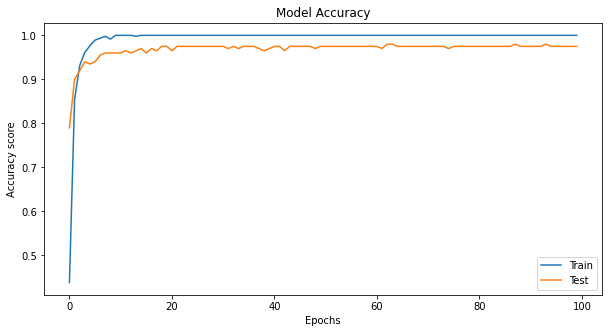

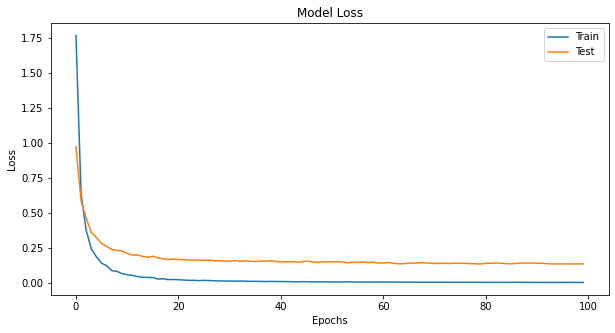

In [20]:
plt.figure(figsize=(10,5))
plt.plot(acc)
plt.plot(val_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

plt.figure(figsize=(10,5))
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Train','Test'])
plt.show()

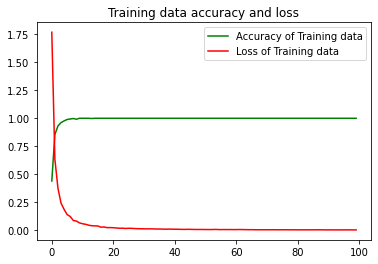

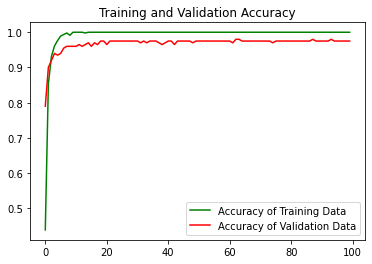

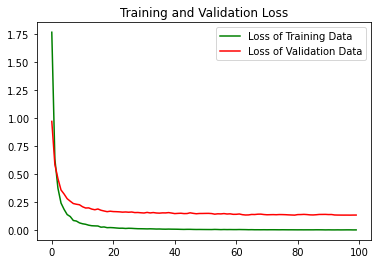

<Figure size 432x288 with 0 Axes>

In [21]:
epochs = range(len(get_ac))
plt.plot(epochs, acc, 'g', label='Accuracy of Training data')
plt.plot(epochs, loss, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [22]:
preds2=model2.predict(x_test)

predictions2=np.argmax(preds2,axis=1)

6/6 [==============================] - 3s 314ms/step


In [28]:
correct_preds=[]
incorrect_preds=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])!=predictions2[i]):
        incorrect_preds.append(i)
    else:
        correct_preds.append(i)


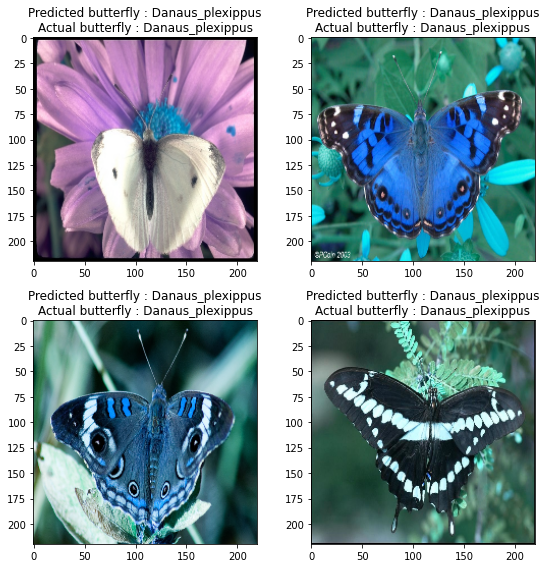

In [32]:
count=0
fig,ax=plt.subplots(2,2)
fig.set_size_inches(8,8)
for i in range (2):
    for j in range (2):
        ax[i,j].imshow(x_test[correct_preds[count]])
        ax[i,j].set_title("Predicted butterfly : "+ list_labels[predictions2[correct_preds[count]]] +"\n"+"Actual butterfly : "+ list_labels[np.argmax(y_test[correct_preds[count]])])
        plt.tight_layout()
        count+=1